Dataset Link - https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data

column details

There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [79]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
# read data file as dataframe
house_df = pd.read_csv("/content/HousingData.csv")
house_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [81]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [83]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [97]:
# display null values
print(house_df.isna().sum())
# remove null values
house_df.dropna(inplace=True)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


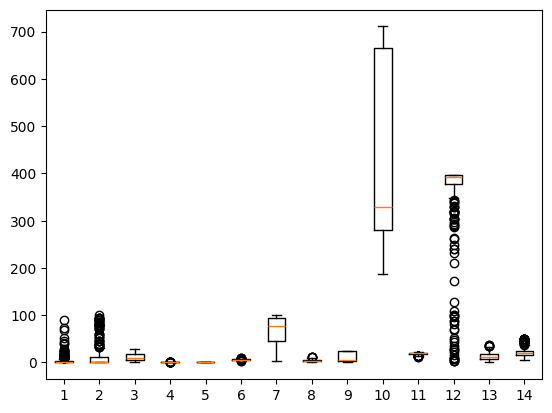

In [98]:
#outlier detection
plt.boxplot(house_df)
plt.show()

In [99]:
#outlier removal
def outlier_removal(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

outlier_removed_df = house_df
for column in house_df.columns:
  outlier_removed_df = outlier_removal(outlier_removed_df, column)

In [100]:
outlier_removed_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,0.250840,6.073529,8.747235,0.0,0.503564,6.213659,61.302941,4.356444,4.547059,311.864706,18.820000,391.407059,10.575941,22.102353
std,0.308794,11.411567,5.369545,0.0,0.057997,0.387489,26.361112,1.724211,1.635631,65.981255,1.643729,6.937511,4.107040,4.022834
min,0.006320,0.000000,1.520000,0.0,0.409000,5.390000,2.900000,1.668700,1.000000,188.000000,14.700000,372.080000,2.980000,13.600000
25%,0.070578,0.000000,5.190000,0.0,0.448000,5.936750,41.200000,2.839525,4.000000,276.000000,17.800000,388.842500,7.205000,19.400000
50%,0.139370,0.000000,7.380000,0.0,0.508500,6.152000,65.250000,4.117750,4.000000,304.000000,19.000000,394.420000,10.040000,21.700000
75%,0.282832,0.000000,9.900000,0.0,0.542500,6.450000,84.175000,5.415900,5.000000,350.250000,20.200000,396.900000,13.150000,24.275000
max,2.242360,45.000000,25.650000,0.0,0.624000,7.412000,100.000000,8.906700,8.000000,437.000000,21.200000,396.900000,21.140000,32.700000


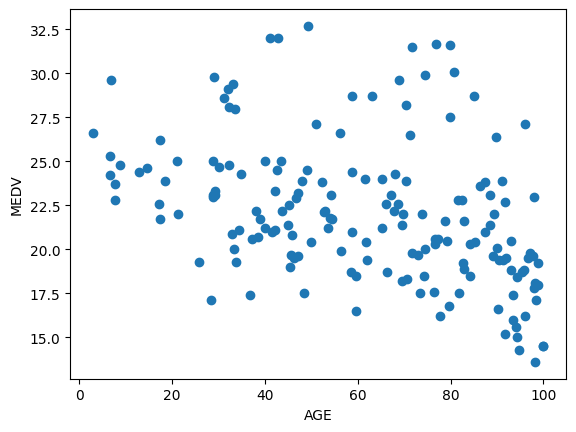

In [101]:
# relationship between Age of the house and price
plt.scatter(data=outlier_removed_df, x="AGE", y="MEDV")
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.show()

In [102]:
# Split features and output
X = outlier_removed_df.drop(["MEDV"], axis=1)
y = outlier_removed_df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# model development
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("MSE - ", mse, "Score -", score)

MSE -  3.359055511265561 Score - 0.8091460741194731


In [104]:
# predict output for new inputs
def predict_value(inputs):
  return linear_regression_model.predict([inputs])[0]

for sample in house_df.iloc[:5].values:
  print("Actual value - ", sample[-1], "predicted - ", predict_value(sample[:-1]) )

Actual value -  24.0 predicted -  24.77019312750654
Actual value -  21.6 predicted -  22.277221564098383
Actual value -  34.7 predicted -  27.804846539310702
Actual value -  33.4 predicted -  26.914868299712857
Actual value -  28.7 predicted -  22.707809020307415
